# Experimento 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq

## Definição de parâmetros

In [48]:
fs = 5000   # taxa de amostragem (Hz)
t_final = 0.15  # tempo de simulação (s)
t = np.arange(0, t_final, 1/fs) # vetor de tempo

## Definindo Sinal da Mensagem

In [50]:
fm = 50   # Hz (bem menor que a portadora)
Am = 1    # amplitude da mensagem
m_t = Am * np.sin(2*np.pi*fm*t) # sinal da mensagem

## Definindo Sinal da Portadora

In [52]:
fc = 250   # Hz
Ac = 1     # amplitude da portadora
c_t = Ac * np.cos(2*np.pi*fc*t) # sinal da portadora

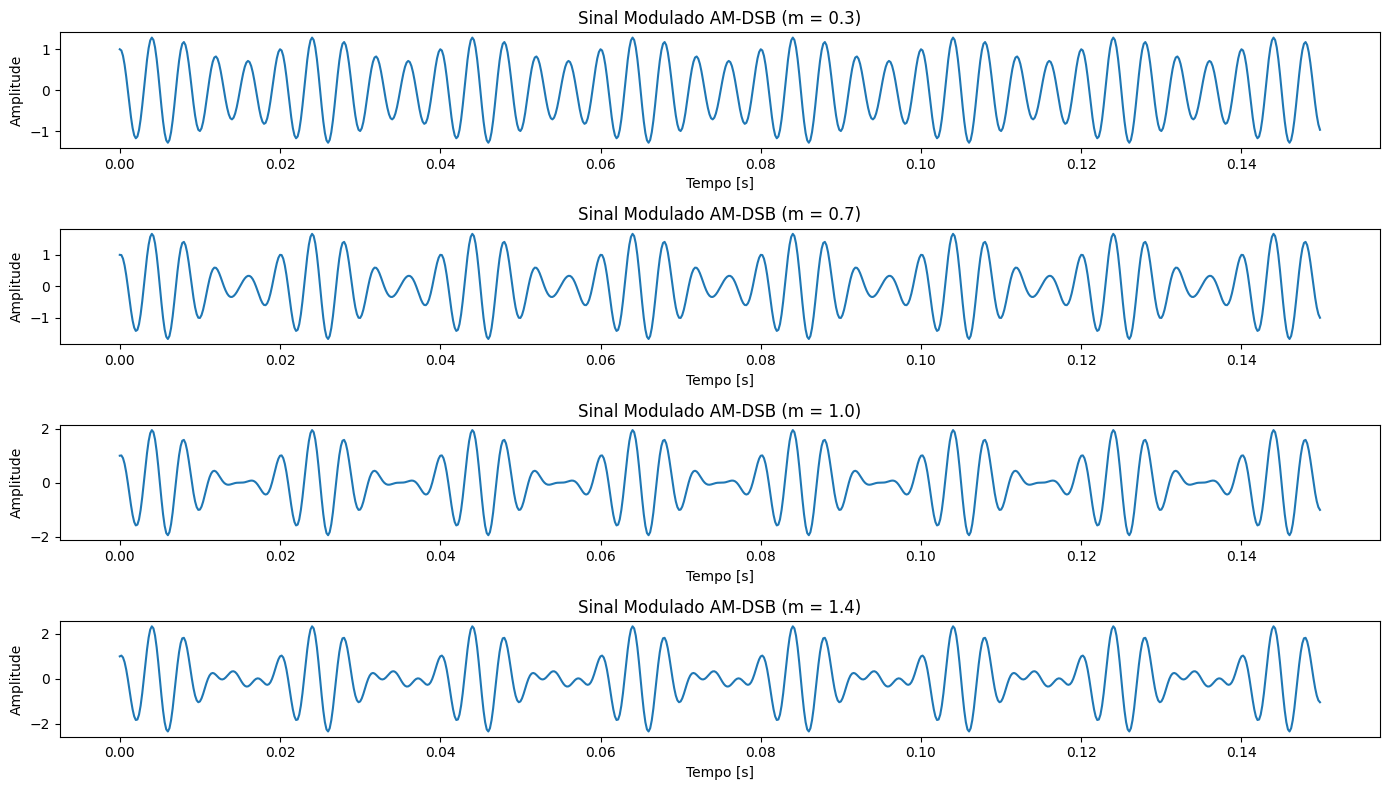

In [54]:
modulation_indexes = [0.3, 0.7, 1.0, 1.4]

plt.figure(figsize=(14,8))
for i, m in enumerate(modulation_indexes, 1):
    s_t = Ac*(1 + m*m_t)*np.cos(2*np.pi*fc*t)  # sinal modulado AM-DSB
    plt.subplot(len(modulation_indexes), 1, i)
    plt.plot(t, s_t)
    plt.title(f"Sinal Modulado AM-DSB (m = {m})")
    plt.xlabel("Tempo [s]")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

**Descrição:**  
Foi gerado um sinal de mensagem senoidal,uma portadora e o sinal modulado AM-DSB:  
Foram utilizados diferentes índices de modulação:  
\[
m = 0.3, \; 0.7, \; 1.0, \; 1.4
\]

**Análise dos resultados:**  
- Para \( m =< 1.0 \): a envoltória segue claramente o sinal da mensagem sem apresentar nehuma distorção.  
- Para \( m > 1 \): ocorre **sobremodulação**, a envoltória se distorce, não seguindo mais o sinal da mensagem. 

**Conclusão:** A saída está de acordo com a teoria, confirmando o efeito do índice de modulação sobre a forma do sinal.

# Experimento 2

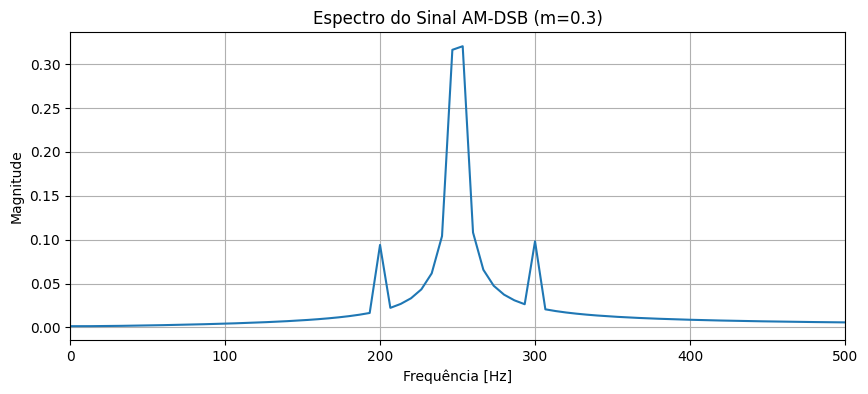

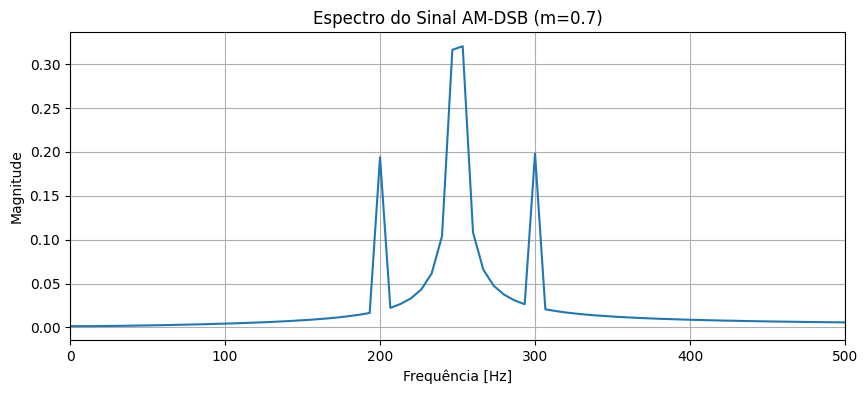

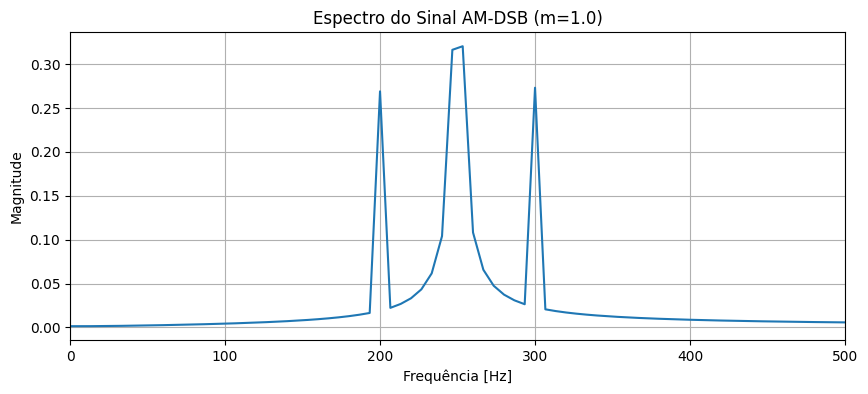

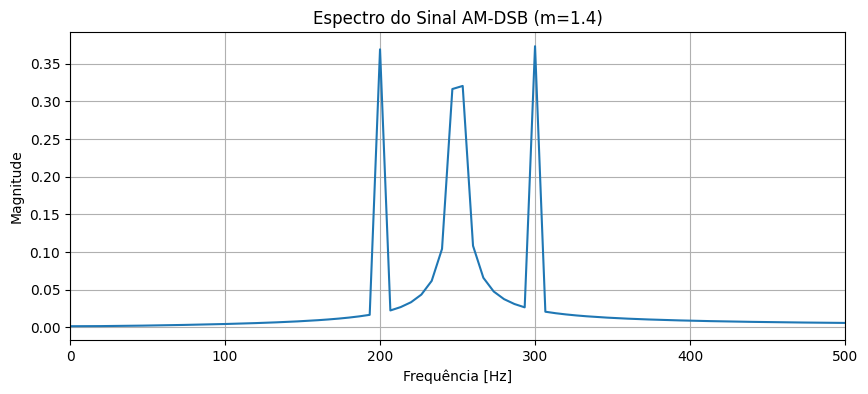

In [6]:
def plot_fft(signal, fs, title):
    N = len(signal)
    freq = fftshift(fftfreq(N, 1/fs))
    spectrum = np.abs(fftshift(fft(signal)))/N
    plt.figure(figsize=(10,4))
    plt.plot(freq, spectrum)
    plt.title(title)
    plt.xlabel("Frequência [Hz]")
    plt.ylabel("Magnitude")
    plt.xlim(0, 500)  # foco nas frequências até 500 Hz
    plt.grid()
    plt.show()

for m in modulation_indexes:
    s_t = Ac*(1 + m*m_t)*np.cos(2*np.pi*fc*t)
    plot_fft(s_t, fs, f"Espectro do Sinal AM-DSB (m={m})")


**Descrição:**  
Aplicou-se a Transformada de Fourier no sinal modulado, obtendo o espectro:

**Análise dos resultados:**  
- O espectro apresenta um pico em \( f_c \) (portadora).  
- Duas bandas laterais surgem em \( f_c \pm f_m \).  
- A amplitude das bandas laterais cresce com o aumento de \( m \).  

**Conclusão:** Os resultados confirmam o comportamento esperado: presença da portadora e deslocamento do espectro da mensagem em torno de \( f_c \).


# Experimento 3

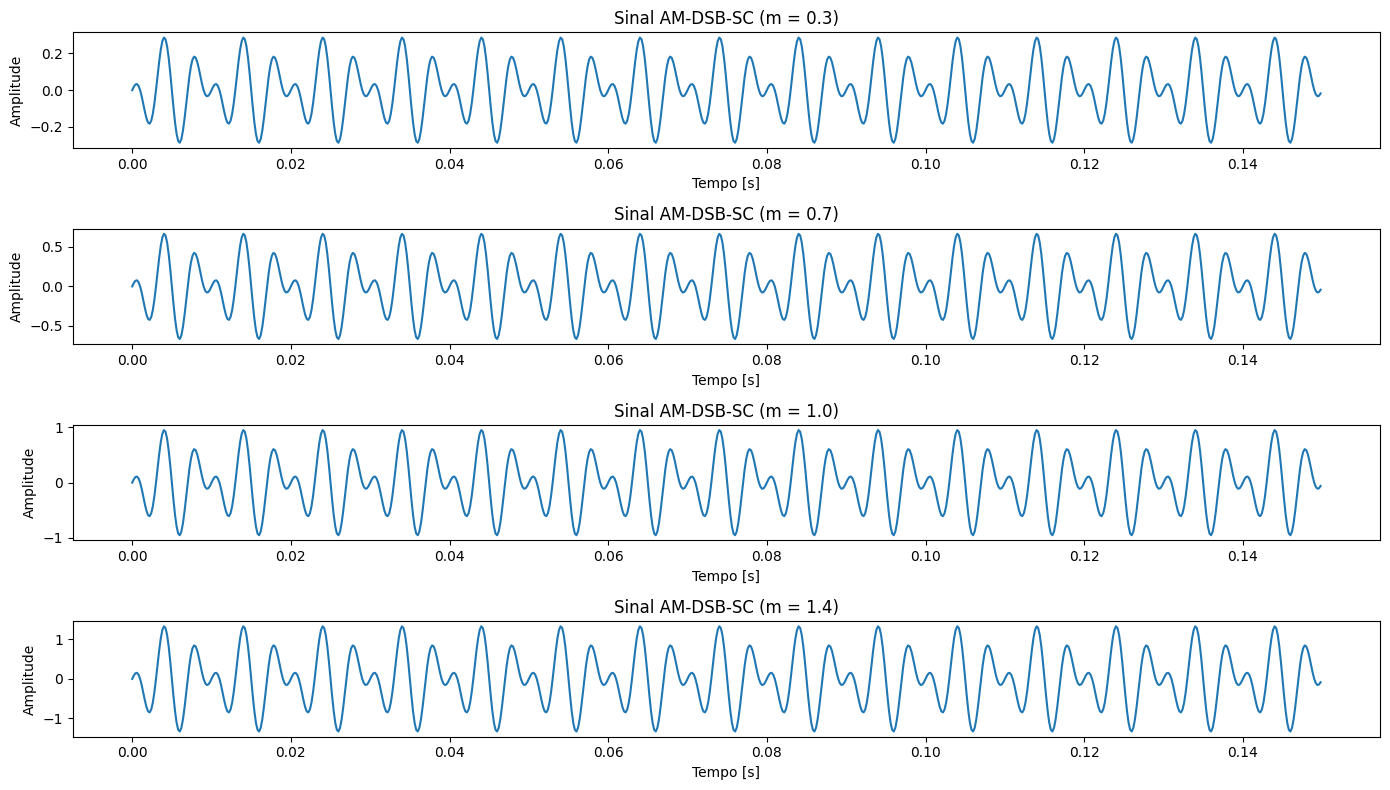

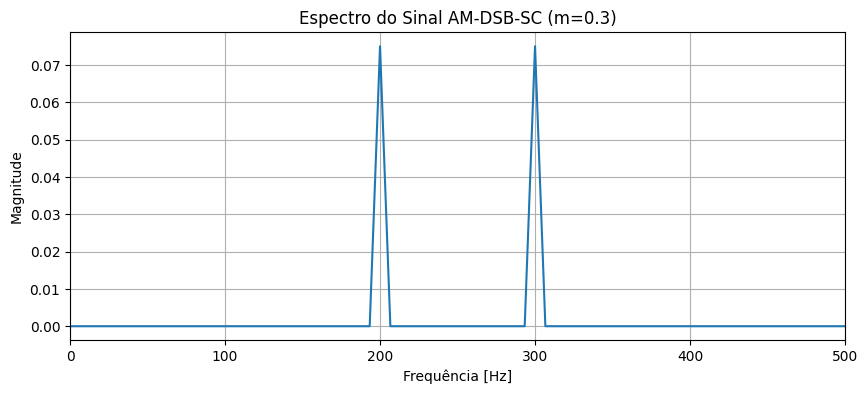

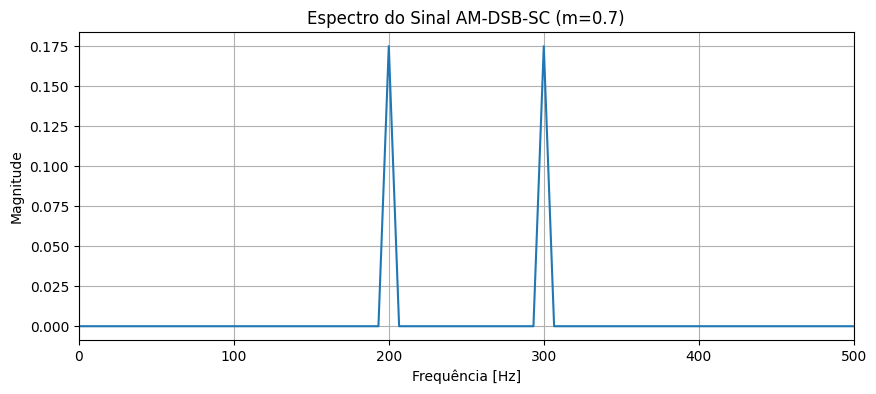

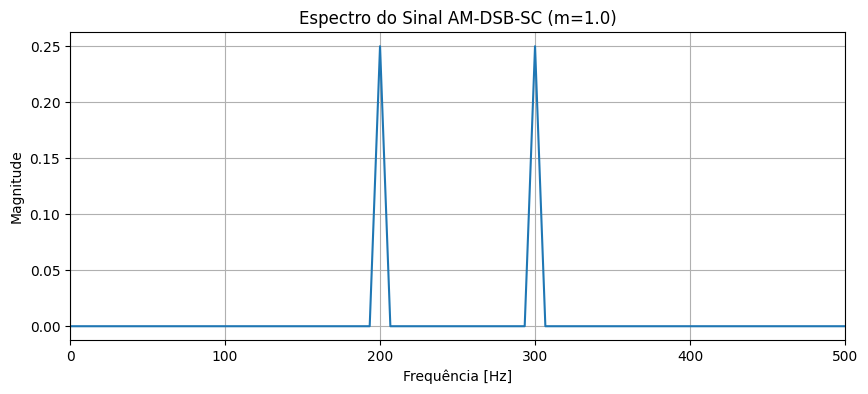

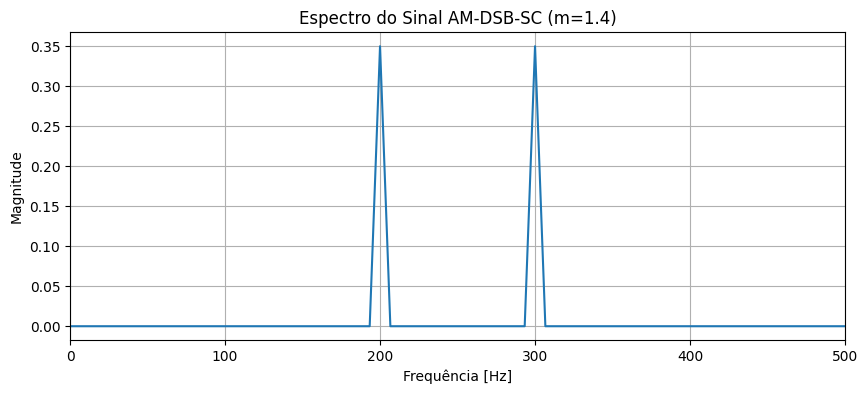

In [7]:
plt.figure(figsize=(14,8))
for i, m in enumerate(modulation_indexes, 1):
    s_t = Ac*m*m_t*np.cos(2*np.pi*fc*t)  # AM-DSB-SC (portadora suprimida)
    plt.subplot(len(modulation_indexes), 1, i)
    plt.plot(t, s_t)
    plt.title(f"Sinal AM-DSB-SC (m = {m})")
    plt.xlabel("Tempo [s]")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

for m in modulation_indexes:
    s_t = Ac*m*m_t*np.cos(2*np.pi*fc*t)
    plot_fft(s_t, fs, f"Espectro do Sinal AM-DSB-SC (m={m})")

**Descrição:**  
Neste caso a modulação sem a presença da portadora.

**Análise dos resultados:**  
- No domínio do tempo: a envoltória não corresponde mais diretamente ao sinal modulante.  
- No espectro: não há componente em \( f_c \), apenas as duas bandas laterais em \( f_c \pm f_m \).  

**Conclusão:** O resultado corresponde à teoria da **modulação DSB-SC**, em que a portadora é eliminada e restam apenas as bandas laterais.